## Quantitative trading in China A stock market with FinRL

Install FinRL

In [1]:
!pip install stockstats
!pip install tushare

Looking in indexes: http://mirrors.aliyun.com/pypi/simple
Looking in indexes: http://mirrors.aliyun.com/pypi/simple


Install other libraries

In [2]:

!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz 
!tar xvzf ta-lib-0.4.0-src.tar.gz
import os
os.chdir('ta-lib') 
!./configure --prefix=/usr
!make
!make install
os.chdir('../')
!pip install TA-Lib

--2024-03-03 21:18:24--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-03-03 21:18:26--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://nchc.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-03-03 21:18:27--  http://nchc.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving nchc.dl.sourceforge.n

checking for a BSD-compatible install... /usr/bin/install -c
checking whether build environment is sane... yes
checking for a thread-safe mkdir -p... /usr/bin/mkdir -p
checking for gawk... no
checking for mawk... mawk
checking whether make sets $(MAKE)... yes
checking for gcc... gcc
checking for C compiler default output file name... a.out
checking whether the C compiler works... yes
checking whether we are cross compiling... no
checking for suffix of executables... 
checking for suffix of object files... o
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking for style of include used by make... GNU
checking dependency style of gcc... gcc3
checking build system type... x86_64-unknown-linux-gnu
checking host system type... x86_64-unknown-linux-gnu
checking for a sed that does not truncate output... /usr/bin/sed
checking for grep that handles long lines and -e... /usr/bin/grep
chec

make[2]: Entering directory '/root/autodl-tmp/stock/ta-lib/src/tools/ta_regtest'
make[2]: Nothing to be done for 'all'.
make[2]: Leaving directory '/root/autodl-tmp/stock/ta-lib/src/tools/ta_regtest'
make[2]: Entering directory '/root/autodl-tmp/stock/ta-lib/src/tools'
make[2]: Nothing to be done for 'all-am'.
make[2]: Leaving directory '/root/autodl-tmp/stock/ta-lib/src/tools'
make[1]: Leaving directory '/root/autodl-tmp/stock/ta-lib/src/tools'
make[1]: Entering directory '/root/autodl-tmp/stock/ta-lib'
make[1]: Nothing to be done for 'all-am'.
make[1]: Leaving directory '/root/autodl-tmp/stock/ta-lib'
Making install in src
make[1]: Entering directory '/root/autodl-tmp/stock/ta-lib/src'
Making install in ta_abstract
make[2]: Entering directory '/root/autodl-tmp/stock/ta-lib/src/ta_abstract'
make[3]: Entering directory '/root/autodl-tmp/stock/ta-lib/src/ta_abstract'
make[3]: Nothing to be done for 'install-exec-am'.
test -z "/usr/include/ta-lib/" || /usr/bin/mkdir -p "/usr/include/ta-l

In [3]:
!git clone https://github.com/AI4Finance-Foundation/FinRL-Meta

fatal: destination path 'FinRL-Meta' already exists and is not an empty directory.


In [4]:
%cd ./FinRL-Meta/

/root/autodl-tmp/stock/FinRL-Meta


### Import modules

In [5]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from IPython import display
display.set_matplotlib_formats("svg")

from meta import config
from meta.data_processors.tushare import Tushare, ReturnPlotter
from meta.env_stock_trading.env_stocktrading_China_A_shares import StockTradingEnv
from agents.stablebaselines3_models import DRLAgent
pd.options.display.max_columns = None
    
print("ALL Modules have been imported!")

2024-03-03 21:19:12.914801: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-03 21:19:12.967136: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI AMX_TILE AMX_INT8 AMX_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-03 21:19:13.965258: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


ALL Modules have been imported!


In [6]:
# import tushare as ts
# import pandas as pd
# import numpy as np
# from tqdm import tqdm

# pro = ts.pro_api('d08e6efb0ee13069f0b3d0be8c8f04076d7bd158131ea0c009ffef8b')
# df = pro.index_daily(ts_code='399300.SZ', start_date='20180701', end_date='20180718')
# df

### Create folders

In [7]:
import os
if not os.path.exists("./datasets" ):
    os.makedirs("./datasets" )
if not os.path.exists("./trained_models"):
    os.makedirs("./trained_models" )
if not os.path.exists("./tensorboard_log"):
    os.makedirs("./tensorboard_log" )
if not os.path.exists("./results" ):
    os.makedirs("./results" )

### Download data, cleaning and feature engineering

In [8]:
ticket_list=['600000.SH', '600009.SH', '600016.SH', '600028.SH', '600030.SH',
       '600031.SH', '600036.SH', '600050.SH', '600104.SH', '600196.SH',
       '600276.SH', '600309.SH', '600519.SH', '600547.SH', '600570.SH']

train_start_date='2015-01-01'
train_stop_date='2019-08-01'
val_start_date='2019-08-01'
val_stop_date='2021-01-03'
token='27080ec403c0218f96f388bca1b1d85329d563c91a43672239619ef5'

# token='d08e6efb0ee13069f0b3d0be8c8f04076d7bd158131ea0c009ffef8b'

In [9]:
# download and clean
ts_processor = Tushare(data_source="tushare", 
                                   start_date=train_start_date,
                                   end_date=val_stop_date,
                                   time_interval="1d",
                                   token=token)
ts_processor.download_data(ticker_list=ticket_list)

100%|██████████| 15/15 [00:07<00:00,  2.06it/s]


Download complete! Dataset saved to ./data/dataset.csv. 
Shape of DataFrame: (21574, 8)


In [10]:
ts_processor.clean_data()
ts_processor.fillna()
ts_processor.dataframe

Shape of DataFrame:  (21930, 8)


,tic,time,open,high,low,close,adjusted_close,volume
0,600000.SH,2015-01-05,15.88,16.25,15.56,16.07,16.07,5135687.09
1,600009.SH,2015-01-05,19.82,20.91,19.82,20.53,20.53,371485.54
2,600016.SH,2015-01-05,10.87,10.96,10.50,10.78,10.78,9138873.70
3,600028.SH,2015-01-05,6.59,7.14,6.45,7.14,7.14,11864996.45
4,600030.SH,2015-01-05,33.90,35.25,33.01,34.66,34.66,6986272.15
...,...,...,...,...,...,...,...,...
21925,600276.SH,2020-12-31,112.55,112.66,110.01,111.46,111.46,281568.85
21926,600309.SH,2020-12-31,89.88,91.48,88.70,91.04,91.04,213631.34
21927,600519.SH,2020-12-31,1941.00,1998.98,1939.00,1998.00,1998.00,38860.07
21928,600547.SH,2020-12-31,23.60,23.75,23.48,23.62,23.62,213786.94


In [11]:
# add_technical_indicator
ts_processor.add_technical_indicator(config.INDICATORS)
ts_processor.fillna()
ts_processor.dataframe

tech_indicator_list:  ['macd', 'boll_ub', 'boll_lb', 'rsi_30', 'cci_30', 'dx_30', 'close_30_sma', 'close_60_sma']
indicator:  macd
indicator:  boll_ub
indicator:  boll_lb
indicator:  rsi_30
indicator:  cci_30
indicator:  dx_30
indicator:  close_30_sma
indicator:  close_60_sma
Succesfully add technical indicators
Shape of DataFrame:  (21885, 17)


,tic,time,index,open,high,low,close,adjusted_close,volume,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma
0,600000.SH,2015-01-08,45,15.87,15.88,15.20,15.25,15.25,3306271.72,-0.032571,16.617911,15.012089,6.058641,-125.593009,23.014040,15.815000,15.815000
1,600009.SH,2015-01-08,46,20.18,20.18,19.73,20.00,20.00,198117.45,-0.016008,20.663897,19.736103,12.828915,-90.842491,100.000000,20.200000,20.200000
2,600016.SH,2015-01-08,47,10.61,10.66,10.09,10.20,10.20,4851684.17,-0.018247,10.957604,9.997396,11.862558,-99.887006,100.000000,10.477500,10.477500
3,600028.SH,2015-01-08,48,7.09,7.41,6.83,6.85,6.85,8190902.35,-0.008227,7.342000,6.743000,27.409248,36.578171,64.934862,7.042500,7.042500
4,600030.SH,2015-01-08,49,36.40,36.70,34.68,35.25,35.25,6376268.69,0.032910,36.576444,33.808556,61.517448,47.947020,100.000000,35.192500,35.192500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21880,600276.SH,2020-12-31,21925,112.55,112.66,110.01,111.46,111.46,281568.85,5.999563,120.049291,81.980709,65.497668,108.629006,49.657169,96.356667,92.992167
21881,600309.SH,2020-12-31,21926,89.88,91.48,88.70,91.04,91.04,213631.34,1.723646,92.780907,79.425093,58.501768,115.410537,38.129756,85.693000,84.104667
21882,600519.SH,2020-12-31,21927,1941.00,1998.98,1939.00,1998.00,1998.00,38860.07,42.535547,1942.989267,1761.052733,66.422960,220.691463,52.684229,1815.039333,1761.921500
21883,600547.SH,2020-12-31,21928,23.60,23.75,23.48,23.62,23.62,213786.94,-0.252554,24.495355,23.032645,42.060734,-55.475296,0.003164,23.883667,24.534000


### Split traning dataset

In [12]:
train =ts_processor.data_split(ts_processor.dataframe, train_start_date, train_stop_date)       
len(train.tic.unique())

15

In [13]:
train.tic.unique()

array(['600000.SH', '600009.SH', '600016.SH', '600028.SH', '600030.SH',
       '600031.SH', '600036.SH', '600050.SH', '600104.SH', '600196.SH',
       '600276.SH', '600309.SH', '600519.SH', '600547.SH', '600570.SH'],
      dtype=object)

In [14]:
train['date'] = train['time']

In [15]:
train.head()

,tic,time,index,open,high,low,close,adjusted_close,volume,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,date
0,600000.SH,2015-01-08,45,15.87,15.88,15.20,15.25,15.25,3306271.72,-0.032571,16.617911,15.012089,6.058641,-125.593009,23.014040,15.8150,15.8150,2015-01-08
0,600009.SH,2015-01-08,46,20.18,20.18,19.73,20.00,20.00,198117.45,-0.016008,20.663897,19.736103,12.828915,-90.842491,100.000000,20.2000,20.2000,2015-01-08
0,600016.SH,2015-01-08,47,10.61,10.66,10.09,10.20,10.20,4851684.17,-0.018247,10.957604,9.997396,11.862558,-99.887006,100.000000,10.4775,10.4775,2015-01-08
0,600028.SH,2015-01-08,48,7.09,7.41,6.83,6.85,6.85,8190902.35,-0.008227,7.342000,6.743000,27.409248,36.578171,64.934862,7.0425,7.0425,2015-01-08
0,600030.SH,2015-01-08,49,36.40,36.70,34.68,35.25,35.25,6376268.69,0.032910,36.576444,33.808556,61.517448,47.947020,100.000000,35.1925,35.1925,2015-01-08


In [16]:
train.shape

(16695, 18)

In [17]:
stock_dimension = len(train.tic.unique())
state_space = stock_dimension*(len(config.INDICATORS)+2)+1
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 15, State Space: 151


### Train

In [18]:
env_kwargs = {
    "stock_dim": stock_dimension,
    "hmax": 1000, 
    "initial_amount": 1000000, 
    "buy_cost_pct":6.87e-5,
    "sell_cost_pct":1.0687e-3,
    "reward_scaling": 1e-4,
    "state_space": state_space, 
    "action_space": stock_dimension,
    "tech_indicator_list": config.INDICATORS, 
    "print_verbosity": 1,
    "initial_buy":True,
    "hundred_each_trade":False
}

e_train_gym = StockTradingEnv(df = train, **env_kwargs)

In [19]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


## DDPG

In [20]:
agent = DRLAgent(env = env_train)
DDPG_PARAMS = {
                "batch_size": 256, 
               "buffer_size": 50000, 
               "learning_rate": 0.0005,
               "action_noise":"normal",
                }
# POLICY_KWARGS = dict(net_arch=dict(pi=[64, 64], qf=[400, 300]))
POLICY_KWARGS = dict(net_arch=dict(pi=[64, 64], qf=[400, 300]))
model_ddpg = agent.get_model("ddpg", model_kwargs = DDPG_PARAMS, policy_kwargs=POLICY_KWARGS)

{'batch_size': 256, 'buffer_size': 50000, 'learning_rate': 0.0005, 'action_noise': NormalActionNoise(mu=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], sigma=[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1])}
Using cuda device


In [21]:
trained_ddpg = agent.train_model(model=model_ddpg, 
                              tb_log_name='ddpg',
                              total_timesteps=10000)


Logging to tensorboard_log/ddpg/ddpg_19
Episode: 2
day: 1112, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1428869.01
total_reward: 428869.01
total_cost: 16655.30
total_trades: 1514
Sharpe: 0.435
Episode: 3
day: 1112, episode: 3
begin_total_asset: 1000000.00
end_total_asset: 2840266.36
total_reward: 1840266.36
total_cost: 295.12
total_trades: 51
Sharpe: 0.963
Episode: 4
day: 1112, episode: 4
begin_total_asset: 1000000.00
end_total_asset: 2531933.21
total_reward: 1531933.21
total_cost: 245.38
total_trades: 41
Sharpe: 0.862
Episode: 5
day: 1112, episode: 5
begin_total_asset: 1000000.00
end_total_asset: 2745275.60
total_reward: 1745275.60
total_cost: 245.99
total_trades: 42
Sharpe: 0.958
------------------------------------
| time/              |             |
|    episodes        | 4           |
|    fps             | 94          |
|    time_elapsed    | 47          |
|    total_timesteps | 4452        |
| train/             |             |
|    actor_loss      | 427        

## PPO

In [22]:
# agent = DRLAgent(env = env_train)
# POLICY_KWARGS = dict(net_arch=dict(pi=[64, 64], qf=[400, 300]))
# model_ddpg = agent.get_model("ppo", policy_kwargs=POLICY_KWARGS)

In [23]:
# trained_ddpg = agent.train_model(model=model_ddpg, 
#                              tb_log_name='ppo',
#                              total_timesteps=10000)

## A2C

In [24]:
# agent = DRLAgent(env = env_train)
# model_ddpg = agent.get_model("a2c")

In [25]:
# trained_ddpg = agent.train_model(model=model_ddpg, 
#                              tb_log_name='a2c',
#                              total_timesteps=50000)

### Trade

In [26]:
trade = ts_processor.data_split(ts_processor.dataframe, val_start_date, val_stop_date)


In [27]:
trade['date'] = trade['time'] 

In [28]:
env_kwargs = {
    "stock_dim": stock_dimension,
    "hmax": 1000, 
    "initial_amount": 1000000, 
    "buy_cost_pct":6.87e-5,
    "sell_cost_pct":1.0687e-3,
    "reward_scaling": 1e-4,
    "state_space": state_space, 
    "action_space": stock_dimension,
    "tech_indicator_list": config.INDICATORS, 
    "print_verbosity": 1,
    "initial_buy":False,
    "hundred_each_trade":True
}
e_trade_gym = StockTradingEnv(df = trade, **env_kwargs)

In [29]:
df_account_value, df_actions = DRLAgent.DRL_prediction(model=trained_ddpg,
                       environment = e_trade_gym)

Episode: 2
day: 345, episode: 2
begin_total_asset: 1000000.00
end_total_asset: 1938184.83
total_reward: 938184.83
total_cost: 118.17
total_trades: 9
Sharpe: 1.917
hit end!


### Backtest

In [30]:
df_account_value['time'] = df_account_value['date']

In [31]:
trade_new = trade[trade.time.isin(df_account_value.date.astype(str))]
trade_new.time.nunique()

345

In [32]:
# %matplotlib inline
plotter = ReturnPlotter(df_account_value, trade_new, val_start_date, val_stop_date)
# plotter.plot_all()

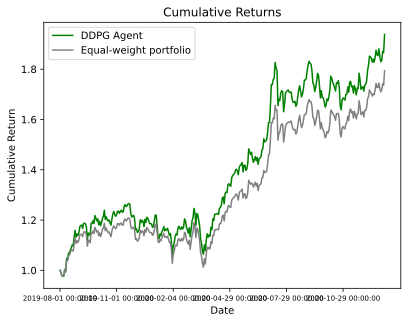

<Figure size 640x480 with 0 Axes>

In [33]:
%matplotlib inline
plotter.plot()

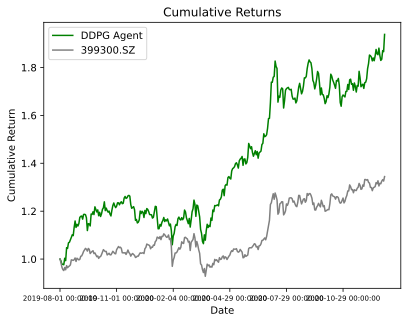

<Figure size 640x480 with 0 Axes>

In [34]:
%matplotlib inline
# ticket: SSE 300：399300
plotter.plot("399300.SZ")

#### Use pyfolio

In [35]:
# CSI 300
baseline_df = plotter.get_baseline("399300.SZ")

In [36]:
baseline_df

,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount,dt,time
486,399300.SZ,20190102,2969.5353,3017.0674,3018.7759,2958.4883,3010.6536,-41.1183,-1.3658,68663021.0,76105571.2,20190102,2019-01-02
485,399300.SZ,20190103,2964.8421,2963.0186,3000.4413,2953.2548,2969.5353,-4.6932,-0.1580,70867103.0,76664797.3,20190103,2019-01-03
484,399300.SZ,20190104,3035.8741,2940.1916,3036.8147,2935.8295,2964.8421,71.0320,2.3958,103318972.0,107141037.0,20190104,2019-01-04
483,399300.SZ,20190107,3054.3030,3055.1535,3061.7490,3035.9123,3035.8741,18.4289,0.6070,101164359.0,105703940.7,20190107,2019-01-07
482,399300.SZ,20190108,3047.7035,3049.8747,3055.5100,3038.5339,3054.3030,-6.5995,-0.2161,86170585.0,79628882.6,20190108,2019-01-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,399300.SZ,20201225,5042.0137,4985.7695,5042.0978,4973.6812,5000.0154,41.9983,0.8400,121006979.0,243992268.2,20201225,2020-12-25
3,399300.SZ,20201228,5064.4147,5042.9432,5089.3447,5037.8582,5042.0137,22.4010,0.4443,136914407.0,281019254.1,20201228,2020-12-28
2,399300.SZ,20201229,5042.9361,5071.4490,5077.4167,5034.3078,5064.4147,-21.4786,-0.4241,141198662.0,279035233.2,20201229,2020-12-29
1,399300.SZ,20201230,5113.7105,5037.9848,5113.7105,5036.6288,5042.9361,70.7744,1.4034,148626448.0,296577812.6,20201230,2020-12-30


In [37]:
import pyfolio
from pyfolio import timeseries
daily_return = plotter.get_return(df_account_value)
daily_return_base = plotter.get_return(baseline_df, value_col_name="close")

perf_func = timeseries.perf_stats
perf_stats_all = perf_func(returns=daily_return, 
                              factor_returns=daily_return_base, 
                                positions=None, transactions=None, turnover_denom="AGB")
print("==============DRL Strategy Stats===========")
perf_stats_all

==============DRL Strategy Stats===========


Annual return          0.621606
Cumulative returns     0.938318
Annual volatility      0.272476
Sharpe ratio           1.917130
Calmar ratio           3.818890
Stability              0.835830
Max drawdown          -0.162771
Omega ratio            1.383193
Sortino ratio          2.923875
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.318162
Daily value at risk   -0.032256
Alpha                  0.348986
Beta                   0.937265
dtype: float64

In [38]:
import pyfolio
from pyfolio import timeseries
daily_return = plotter.get_return(df_account_value)
daily_return_base = plotter.get_return(baseline_df, value_col_name="close")

perf_func = timeseries.perf_stats
perf_stats_all = perf_func(returns=daily_return_base, 
                              factor_returns=daily_return_base, 
                                positions=None, transactions=None, turnover_denom="AGB")
print("==============Baseline Strategy Stats===========")
perf_stats_all

==============Baseline Strategy Stats===========


Annual return          0.337801
Cumulative returns     0.754917
Annual volatility      0.213331
Sharpe ratio           1.474610
Calmar ratio           2.100821
Stability              0.726100
Max drawdown          -0.160795
Omega ratio            1.303832
Sortino ratio          2.166007
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.225094
Daily value at risk   -0.025629
Alpha                  0.000000
Beta                   1.000000
dtype: float64